# Analysis

Fast notebook with some tables and plots to understand better how the algorithm
behaves on different datasets and with different parallel backends.

In [1]:
import pandas as pd

df = pd.read_csv("../results/cluster_magic_1.csv")
display(df)


fields = [
    "estimators",
    "threads",
    "nodes",
    "train_time",
    "train_predict_time",
    "test_predict_time",
]

seq = df[df["backend"] == "seq"][fields]
omp = df[df["backend"] == "omp"][fields]
ff = df[df["backend"] == "ff"][fields]
mpi = df[df["backend"] == "mpi"][fields]

display(seq, omp, ff, mpi)

,estimators,max_depth,backend,threads,nodes,dataset,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time
0,32,0,ff,1,1,magic,0.998488,0.998341,0.876446,0.860165,12286.0400,63.48258,18.775780
1,32,0,ff,2,1,magic,0.998488,0.998341,0.876446,0.860165,6530.8760,38.63598,9.652318
2,32,0,ff,4,1,magic,0.998488,0.998341,0.876446,0.860165,3333.4920,23.99394,7.563590
3,32,0,ff,8,1,magic,0.998488,0.998341,0.876446,0.860165,1668.3540,15.07022,5.202218
4,32,0,ff,16,1,magic,0.998488,0.998341,0.876446,0.860165,856.0372,12.20008,6.025378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,256,0,omp,4,1,magic,1.000000,1.000000,0.878286,0.861595,26021.0400,119.85140,31.913200
144,256,0,omp,8,1,magic,1.000000,1.000000,0.878286,0.861595,13410.6800,65.96118,17.303080
145,256,0,omp,16,1,magic,1.000000,1.000000,0.878286,0.861595,6803.1200,35.42266,9.716358
146,256,0,omp,32,1,magic,1.000000,1.000000,0.878286,0.861595,5118.1900,29.50376,7.946264


,estimators,threads,nodes,train_time,train_predict_time,test_predict_time
36,32,1,1,12250.56,54.75608,14.56674
73,64,1,1,24438.38,105.50720,28.35564
110,128,1,1,48799.94,209.59400,59.12766
147,256,1,1,98556.80,419.90480,117.27000


,estimators,threads,nodes,train_time,train_predict_time,test_predict_time
30,32,1,1,12309.8400,55.730720,14.463860
31,32,2,1,6504.4540,31.031660,7.915618
32,32,4,1,3299.1400,19.942560,5.051594
33,32,8,1,1725.3780,12.632940,3.140628
34,32,16,1,881.5404,5.989986,1.802244
35,32,32,1,672.5498,5.789460,1.704658
67,64,1,1,24333.5000,108.654200,28.250540
68,64,2,1,12655.5400,59.225460,15.293860
69,64,4,1,6478.8940,33.276880,8.567384
70,64,8,1,3362.0320,20.106620,5.052656


,estimators,threads,nodes,train_time,train_predict_time,test_predict_time
0,32,1,1,12286.0400,63.48258,18.775780
1,32,2,1,6530.8760,38.63598,9.652318
2,32,4,1,3333.4920,23.99394,7.563590
3,32,8,1,1668.3540,15.07022,5.202218
4,32,16,1,856.0372,12.20008,6.025378
5,32,32,1,648.1384,16.00808,10.765940
37,64,1,1,24590.5800,117.12000,33.537860
38,64,2,1,13077.8200,69.20140,17.723500
39,64,4,1,6669.1340,40.12586,12.429020
40,64,8,1,3341.1460,25.80890,7.715308


,estimators,threads,nodes,train_time,train_predict_time,test_predict_time
6,32,1,1,12280.3000,47.450860,12.363580
7,32,1,2,6181.0780,34.151800,6.657264
8,32,1,4,3101.4360,16.151880,4.357452
9,32,1,8,1542.7040,46.140860,2.041718
10,32,2,1,6432.1500,26.026380,6.575856
...,...,...,...,...,...,...
136,256,16,8,872.9532,21.687524,1.381816
137,256,32,1,5092.4260,38.710160,13.373884
138,256,32,2,2569.2560,29.710140,4.105790
139,256,32,4,1306.2480,25.349420,4.545426


### Runtime

The first set of plots shows the runtime trend starting from the sequential
version and the OpenMP and FastFlow version, starting from 2 threads, up to 32.

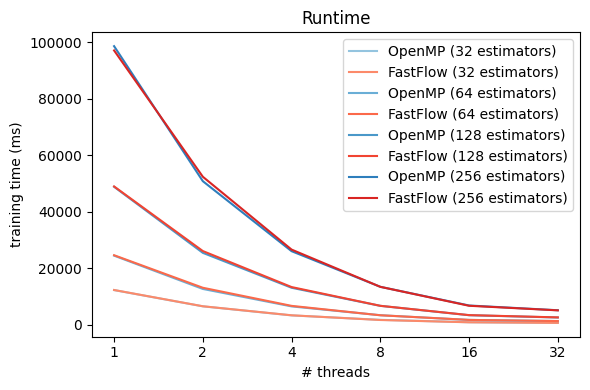

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm

plt.figure(figsize=(6, 4), dpi=100)
plt.title("Runtime")


estimators = df["estimators"].unique()
cmap_omp = cm.get_cmap("Blues")
cmap_ff = cm.get_cmap("Reds")

cmin, cmax = 0.4, 0.7


def color_from_cmap(cmap, i, n):
    t = cmin + (cmax - cmin) * (i / (n - 1))
    return cmap(t)


for i, e in enumerate(estimators):
    color_omp = color_from_cmap(cmap_omp, i, len(estimators))
    color_ff = color_from_cmap(cmap_ff, i, len(estimators))

    seq_tt = seq[seq["estimators"] == e]["train_time"]
    omp_e = omp[omp["estimators"] == e]
    omp_tt = omp_e["train_time"].to_list()[1:]
    omp_tt.insert(0, seq_tt.iloc[0])
    
    plt.plot(
        omp_e["threads"],
        omp_tt,
        color=color_omp,
        label=f"OpenMP ({e} estimators)",
    )

    ff_e = ff[ff["estimators"] == e]
    ff_tt = ff_e["train_time"].to_list()[1:]
    ff_tt.insert(0, seq_tt.iloc[0])
    
    plt.plot(
        ff_e["threads"],
        ff_e["train_time"],
        color=color_ff,
        label=f"FastFlow ({e} estimators)",
    )

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("training time (ms)")
plt.legend()
plt.tight_layout()
plt.show()

## Speedup

In [5]:
import numpy as np


for i, e in enumerate(estimators):
    color_omp = color_from_cmap(cmap_omp, i, len(estimators))
    color_ff = color_from_cmap(cmap_ff, i, len(estimators))

    seq_tt = seq[seq["estimators"] == e]["train_time"]
    omp_e = omp[omp["estimators"] == e]
    omp_tt = omp_e["train_time"].to_numpy()[1:]
    
    
    seq_tt = np.ones(len(omp_tt)) * seq_tt
    omp_su = seq_tt / omp_tt
    
    plt.plot(
        omp_e["threads"],
        omp_su,
        color=color_omp,
        label=f"OpenMP ({e} estimators)",
    )

    ff_e = ff[ff["estimators"] == e]
    ff_tt = ff_e["train_time"].to_list()[1:]
    ff_tt.insert(0, seq_tt.iloc[0])
    
    plt.plot(
        ff_e["threads"],
        ff_e["train_time"],
        color=color_ff,
        label=f"FastFlow ({e} estimators)",
    )

ValueError: Length of values (5) does not match length of index (1)